In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("/content/bilkav.com_maaslar.csv")

In [ ]:
df

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500
5,Sef,6,7500
6,Mudur,7,10000
7,Direktor,8,15000
8,C-level,9,25000
9,CEO,10,50000


Linear Regression

In [ ]:
y = df["maas"]
x = df["Egitim Seviyesi"]

In [ ]:
y

0     2250
1     2500
2     3000
3     4000
4     5500
5     7500
6    10000
7    15000
8    25000
9    50000
Name: maas, dtype: int64

In [ ]:
X = pd.DataFrame(x)
Y = pd.DataFrame(y)

In [ ]:
X

,Egitim Seviyesi
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [ ]:
#let's try to add splines to this sometime

In [ ]:
from sklearn.linear_model import LinearRegression

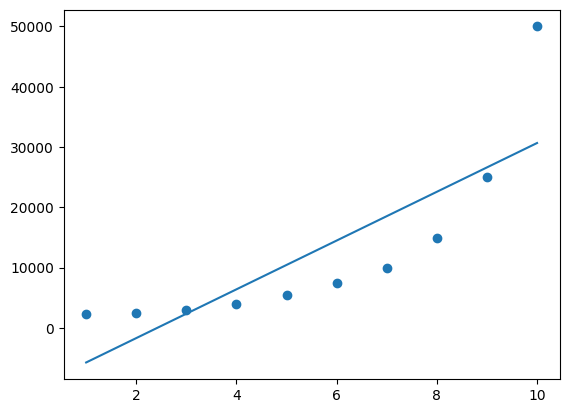

In [ ]:
#let's start with LR in order to benchmark
lr = LinearRegression()
lr.fit(X, Y)

plt.scatter(X,Y)
plt.plot(X, lr.predict(X))
plt.show()

Polynomial Regression

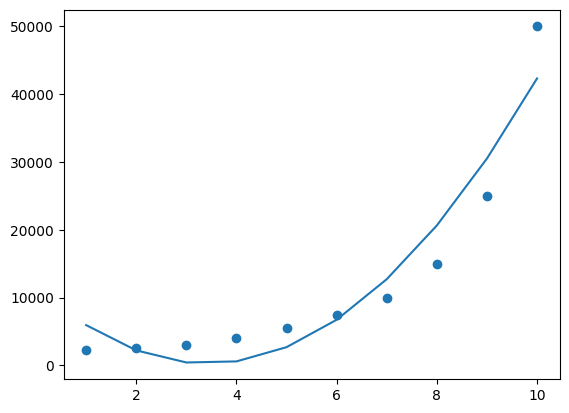

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree = 2)
x_poly = pr.fit_transform(X)
lr2 = LinearRegression()
lr2.fit(x_poly, Y)

plt.scatter(X,Y)
plt.plot(X,lr2.predict(pr.fit_transform(X)))
plt.show()

In [ ]:
#manual prediction
lr2.predict(pr.fit_transform([[11]]))

array([[56091.66666667]])

SVR

In [ ]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
scaled_x = sc1.fit_transform(X)
sc2 = StandardScaler()
scaled_y = sc2.fit_transform(Y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


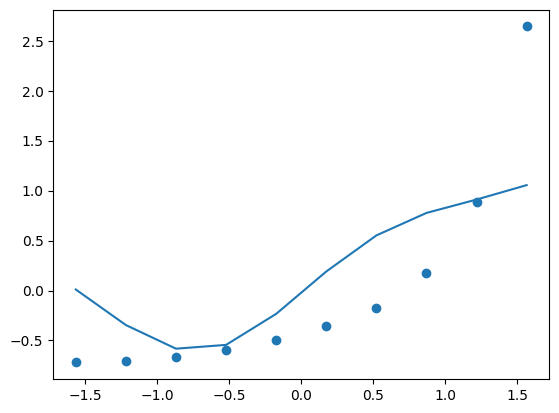

In [ ]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(scaled_x,scaled_y)

plt.scatter(scaled_x,scaled_y)
plt.plot(scaled_x, svr.predict(scaled_x))

In [ ]:
svr.predict()

Decision Tree ve Random Forest

In [ ]:
from sklearn import tree

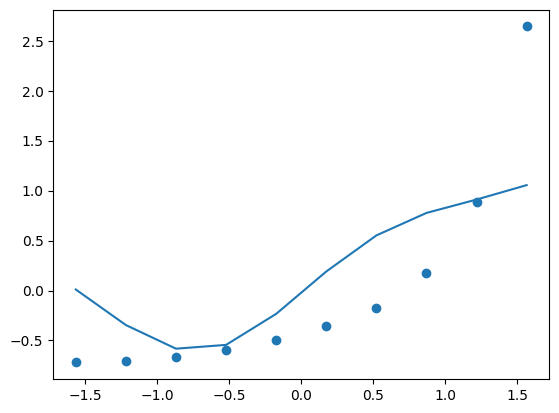

In [ ]:
clf = tree.DecisionTreeRegressor()
clf.fit(scaled_x, scaled_y)

plt.scatter(scaled_x,scaled_y)
plt.plot(scaled_x, svr.predict(scaled_x))
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(scaled_x, scaled_y)

<ipython-input-15-9651975bd9d0>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(scaled_x, scaled_y)


RandomForestRegressor(max_depth=2, random_state=0)

In [ ]:
print(regr.predict([[0]]))

[-0.49648437]


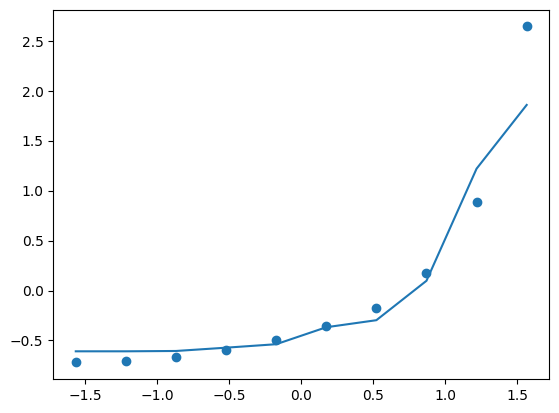

In [ ]:
plt.scatter(scaled_x, scaled_y)
plt.plot(scaled_x, regr.predict(scaled_x))
plt.show()

In [ ]:
#now do predictions with a larger data

In [12]:
veri = pd.read_csv("/content/bilkav.com_odev_tenis.csv")

In [13]:
veri = pd.get_dummies(veri)
veri = veri.drop(["play_no"], axis=1)
#windy
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
w = le.fit_transform(veri["windy"])
veri["windy"] = w
veri.rename(columns= {"play_yes": "play"}, inplace= True)

In [14]:
veri = veri.astype("Float32")

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(veri)

In [16]:
target = veri["humidity"]
x = veri.drop(["humidity"], axis=1)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, target, test_size= 0.33)

In [ ]:
#take a look at R2 and mse mre mape

In [20]:
#Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
y_hat = reg.predict(x_test)

print(f"MSE Score: {mean_squared_error(y_test, y_hat)}")
print(f"MAE Score: {mean_absolute_error(y_test, y_hat)}")
print(f"MAPE Score: {mean_absolute_percentage_error(y_test, y_hat)}")
print(f"R2 Score: {r2_score(y_test, y_hat)}")

MSE Score: 390.1863615734721
MAE Score: 15.780457380457397
MAPE Score: 0.2279234572447244
R2 Score: -2.096717155345017


In [25]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree = 4)
x_poly = pr.fit_transform(x_train)
lr2 = LinearRegression()
lr2.fit(x_poly, y_train)
y_hat = lr2.predict(pr.fit_transform(x_test))

print(f"MSE Score: {mean_squared_error(y_test, y_hat)}")
print(f"MAE Score: {mean_absolute_error(y_test, y_hat)}")
print(f"MAPE Score: {mean_absolute_percentage_error(y_test, y_hat)}")
print(f"R2 Score: {r2_score(y_test, y_hat)}")

MSE Score: 107495.09044726875
MAE Score: 295.56768469987344
MAPE Score: 3.8049418925237126
R2 Score: -852.1356384703869


In [26]:
#SVM
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
y_hat = svr.predict(x_test)

print(f"MSE Score: {mean_squared_error(y_test, y_hat)}")
print(f"MAE Score: {mean_absolute_error(y_test, y_hat)}")
print(f"MAPE Score: {mean_absolute_percentage_error(y_test, y_hat)}")
print(f"R2 Score: {r2_score(y_test, y_hat)}")

MSE Score: 207.8358980190604
MAE Score: 12.619732620503811
MAPE Score: 0.1776607212415055
R2 Score: -0.649491254119527


In [27]:
#Decision Tree
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf.fit(x_train, y_train)
y_hat = clf.predict(x_test)

print(f"MSE Score: {mean_squared_error(y_test, y_hat)}")
print(f"MAE Score: {mean_absolute_error(y_test, y_hat)}")
print(f"MAPE Score: {mean_absolute_percentage_error(y_test, y_hat)}")
print(f"R2 Score: {r2_score(y_test, y_hat)}")

MSE Score: 95.0
MAE Score: 9.0
MAPE Score: 0.12558772496852993
R2 Score: 0.24603174603174605


In [30]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=3, random_state=0)
regr.fit(x_train, y_train)
y_hat = regr.predict(x_test)

print(f"MSE Score: {mean_squared_error(y_test, y_hat)}")
print(f"MAE Score: {mean_absolute_error(y_test, y_hat)}")
print(f"MAPE Score: {mean_absolute_percentage_error(y_test, y_hat)}")
print(f"R2 Score: {r2_score(y_test, y_hat)}")

MSE Score: 177.92571680555562
MAE Score: 11.173833333333334
MAPE Score: 0.15929535490309488
R2 Score: -0.4121088635361556
